In [1]:
print("""
**Data Collection Method:** 
I collected stock market data using web scraping from two sources:
- Wall Street Journal (WSJ) Gainers
- Yahoo Finance (Yahoo) Gainers

Data was collected at multiple timestamps throughout the day using automated scripts.

**Number of Tables:** 16 tables total
- 3 WSJ Gainers tables
- 13 Yahoo Gainers tables

**Database:** DS2508
**Schema:** KHB9GD
""")


**Data Collection Method:** 
I collected stock market data using web scraping from two sources:
- Wall Street Journal (WSJ) Gainers
- Yahoo Finance (Yahoo) Gainers

Data was collected at multiple timestamps throughout the day using automated scripts.

**Number of Tables:** 16 tables total
- 3 WSJ Gainers tables
- 13 Yahoo Gainers tables

**Database:** DS2508
**Schema:** KHB9GD



In [2]:
print("""
**Entity Relationship Diagram:**

┌──────────────────────────────┐
│   Source Tables (16 total)   │
│   WSJGAINERS_* (3 tables)    │
│   YGAINERS_* (13 tables)     │
│   (Many records with symbols)│
└──────────────┬───────────────┘
               │
               │ UNION ALL + 
               │ GROUP BY symbol
               │ COUNT records
               ▼
┌──────────────────────────────┐
│      UNIQUE_SYMS             │
│   (Symbol + Record Count)    │
│   552 unique stock symbols   │
└──────────────────────────────┘
""")


**Entity Relationship Diagram:**

┌──────────────────────────────┐
│   Source Tables (16 total)   │
│   WSJGAINERS_* (3 tables)    │
│   YGAINERS_* (13 tables)     │
│   (Many records with symbols)│
└──────────────┬───────────────┘
               │
               │ UNION ALL + 
               │ GROUP BY symbol
               │ COUNT records
               ▼
┌──────────────────────────────┐
│      UNIQUE_SYMS             │
│   (Symbol + Record Count)    │
│   552 unique stock symbols   │
└──────────────────────────────┘



In [3]:
print("""
**GitHub Repository Link:**
https://github.com/CodeStriker10/2508_DS5111_khb9gd/blob/mo10_dbt_model/my_dbt_project/myfirstproject/models/example/unique_syms.sql

**SQL Code:**
```sql
{{ config(
    materialized='table'
) }}

SELECT 
    symbol,
    COUNT(*) as record_count
FROM (
    SELECT REGEXP_SUBSTR(INDEX_1, '\\\\(([A-Z]+)\\\\)', 1, 1, 'e', 1) AS symbol 
    FROM DS2508.KHB9GD.WSJGAINERS_20251112_093123
    UNION ALL
    SELECT REGEXP_SUBSTR(INDEX_1, '\\\\(([A-Z]+)\\\\)', 1, 1, 'e', 1) AS symbol 
    FROM DS2508.KHB9GD.WSJGAINERS_20251113_160129
    UNION ALL
    SELECT REGEXP_SUBSTR(INDEX_1, '\\\\(([A-Z]+)\\\\)', 1, 1, 'e', 1) AS symbol 
    FROM DS2508.KHB9GD.WSJGAINERS_20251114_093130
    UNION ALL
    SELECT SYMBOL FROM DS2508.KHB9GD.YGAINERS_20251112_123020
    UNION ALL
    SELECT SYMBOL FROM DS2508.KHB9GD.YGAINERS_20251112_160116
    UNION ALL
    SELECT SYMBOL FROM DS2508.KHB9GD.YGAINERS_20251113_093119
    UNION ALL
    SELECT SYMBOL FROM DS2508.KHB9GD.YGAINERS_20251113_123022
    UNION ALL
    SELECT SYMBOL FROM DS2508.KHB9GD.YGAINERS_20251113_160129
    UNION ALL
    SELECT SYMBOL FROM DS2508.KHB9GD.YGAINERS_20251114_093130
    UNION ALL
    SELECT SYMBOL FROM DS2508.KHB9GD.YGAINERS_20251114_123014
    UNION ALL
    SELECT SYMBOL FROM DS2508.KHB9GD.YGAINERS_20251114_160117
    UNION ALL
    SELECT SYMBOL FROM DS2508.KHB9GD.YGAINERS_20251117_093125
    UNION ALL
    SELECT SYMBOL FROM DS2508.KHB9GD.YGAINERS_20251117_123025
    UNION ALL
    SELECT SYMBOL FROM DS2508.KHB9GD.YGAINERS_20251117_160119
)
WHERE symbol IS NOT NULL
GROUP BY symbol
ORDER BY record_count DESC, symbol
```
""")


**GitHub Repository Link:**
https://github.com/CodeStriker10/2508_DS5111_khb9gd/blob/mo10_dbt_model/my_dbt_project/myfirstproject/models/example/unique_syms.sql

**SQL Code:**
```sql
{{ config(
    materialized='table'
) }}

SELECT 
    symbol,
    COUNT(*) as record_count
FROM (
    SELECT REGEXP_SUBSTR(INDEX_1, '\\(([A-Z]+)\\)', 1, 1, 'e', 1) AS symbol 
    FROM DS2508.KHB9GD.WSJGAINERS_20251112_093123
    UNION ALL
    SELECT REGEXP_SUBSTR(INDEX_1, '\\(([A-Z]+)\\)', 1, 1, 'e', 1) AS symbol 
    FROM DS2508.KHB9GD.WSJGAINERS_20251113_160129
    UNION ALL
    SELECT REGEXP_SUBSTR(INDEX_1, '\\(([A-Z]+)\\)', 1, 1, 'e', 1) AS symbol 
    FROM DS2508.KHB9GD.WSJGAINERS_20251114_093130
    UNION ALL
    SELECT SYMBOL FROM DS2508.KHB9GD.YGAINERS_20251112_123020
    UNION ALL
    SELECT SYMBOL FROM DS2508.KHB9GD.YGAINERS_20251112_160116
    UNION ALL
    SELECT SYMBOL FROM DS2508.KHB9GD.YGAINERS_20251113_093119
    UNION ALL
    SELECT SYMBOL FROM DS2508.KHB9GD.YGAINERS_20251113_123022
    U

In [4]:
print("**Full Path to Result Table:**")
print("DS2508.KHB9GD.UNIQUE_SYMS\n")

**Full Path to Result Table:**
DS2508.KHB9GD.UNIQUE_SYMS



In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('Agg')

In [6]:
df = pd.read_csv('unique_syms.csv')

In [7]:
print(f"**Total Unique Symbols:** {len(df)}")
print(f"**Total Records Across All Tables:** {df['RECORD_COUNT'].sum()}\n")

**Total Unique Symbols:** 552
**Total Records Across All Tables:** 1171



In [8]:
top_20 = df.head(20)

In [9]:
print("**Top 10 Symbols by Record Count:**")
print(top_20.head(10).to_string(index=False))

**Top 10 Symbols by Record Count:**
SYMBOL  RECORD_COUNT
    MH            11
   ALB            10
  ONDS             8
  CNTA             7
  CSCO             7
  SNDK             7
   SEE             6
  PRAX             6
  NICE             6
   FLY             6


In [10]:
plt.figure(figsize=(14, 8))
plt.barh(top_20['SYMBOL'], top_20['RECORD_COUNT'], color='steelblue')
plt.xlabel('Number of Records', fontsize=12)
plt.ylabel('Stock Symbol', fontsize=12)
plt.title('Top 20 Stock Symbols by Record Count', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('symbol_histogram.png', dpi=150, bbox_inches='tight')
print("\n**Histogram saved as symbol_histogram.png**")


**Histogram saved as symbol_histogram.png**


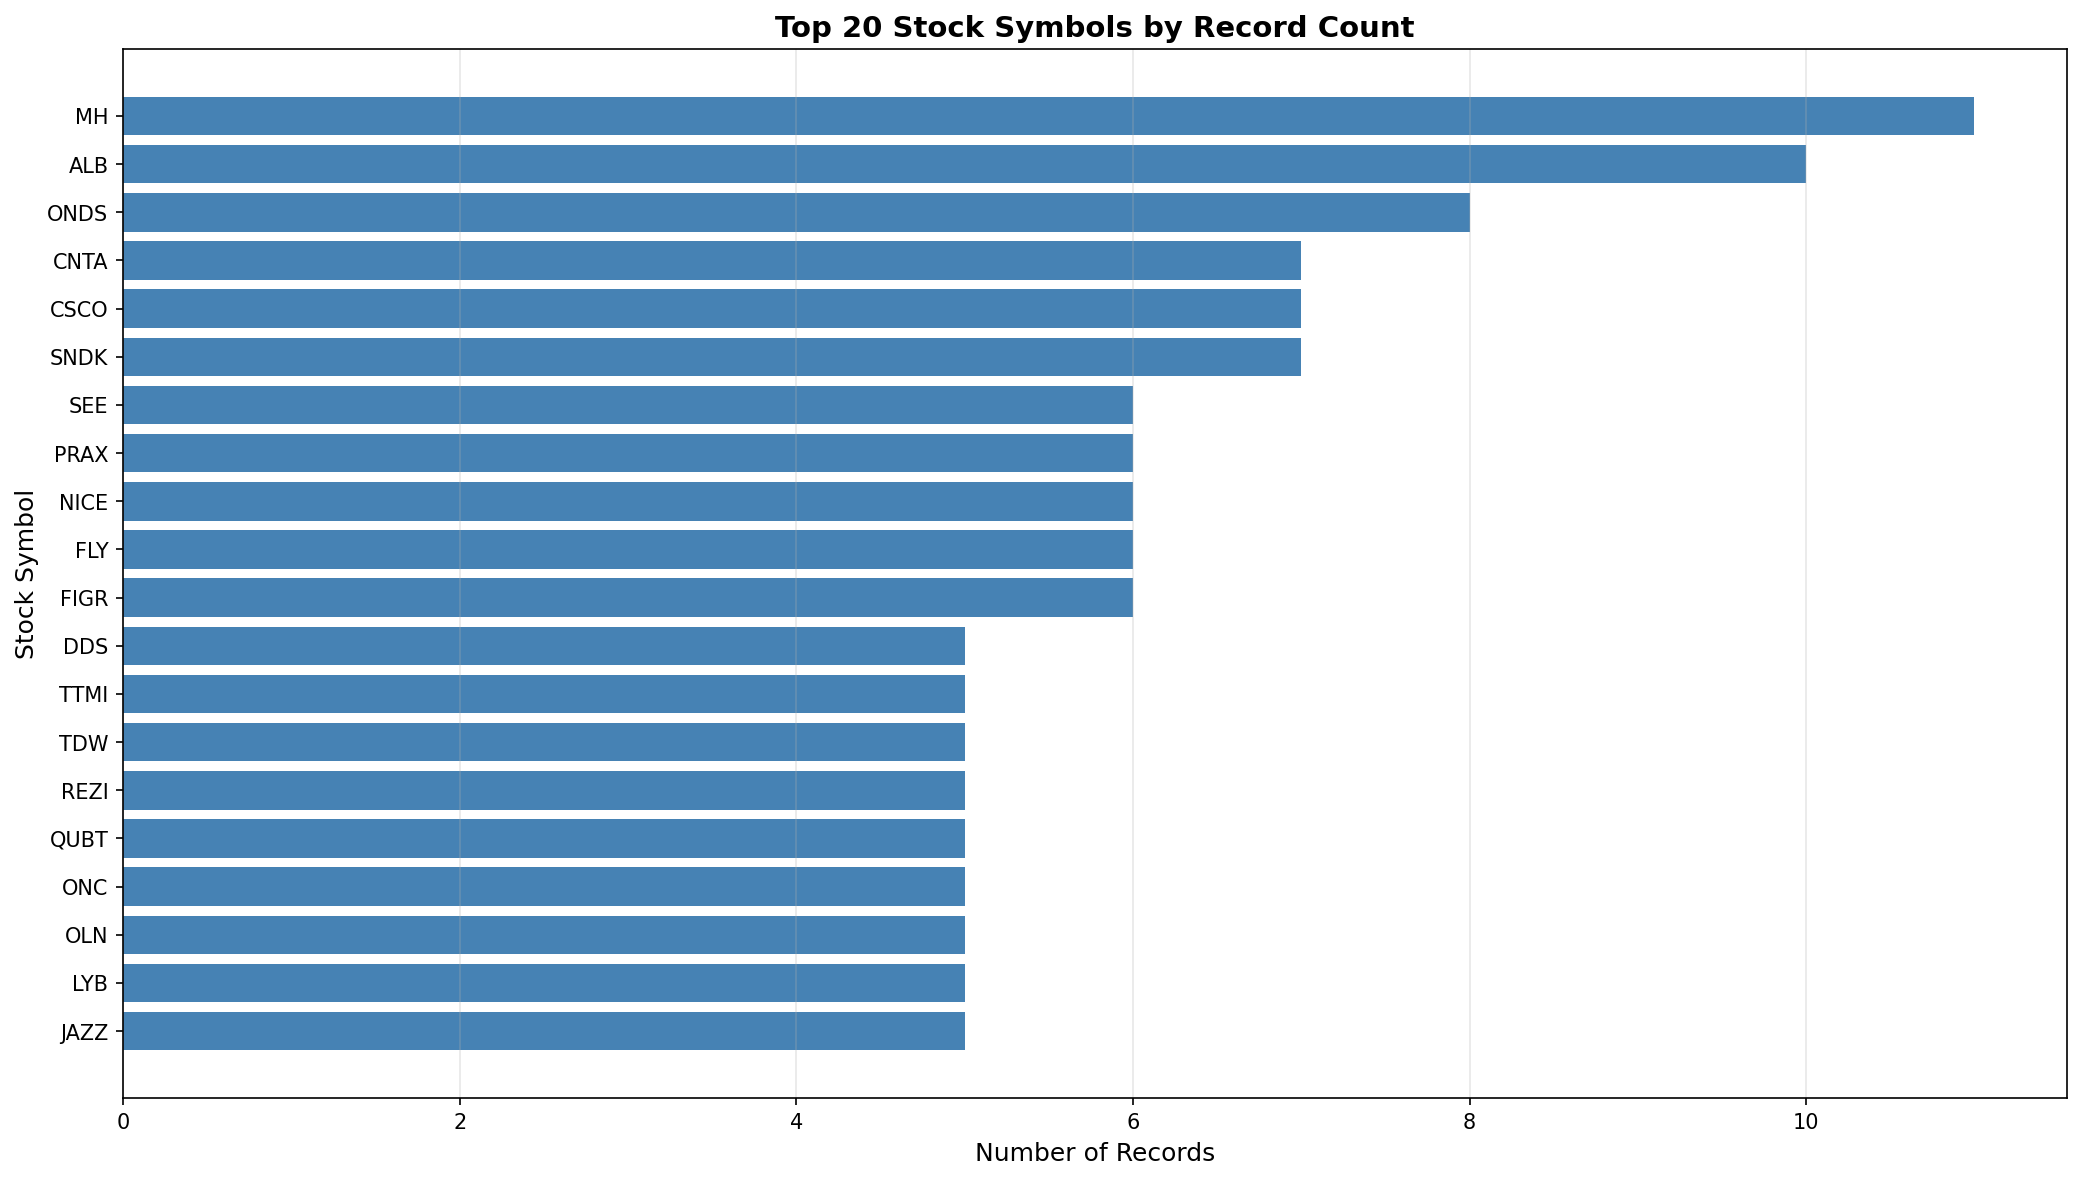

In [11]:
from IPython.display import Image, display
display(Image('symbol_histogram.png'))